# Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec


# Загрузка Датасета

In [2]:
data = pd.read_csv('../../DATA/Split/Численность размещенных лиц в гостиницах и ананлогичных средствах размещения.csv').drop('Unnamed: 0', axis=1)


In [3]:
data.columns.to_numpy().shape

(15,)

# Графики "Коробка с усами"

In [4]:
data = data.apply(lambda s: s.map(lambda a: float(a.replace(',', '.')) if type(a) is str else a))
names = data.columns.to_numpy()[1:]


## Без нормирования

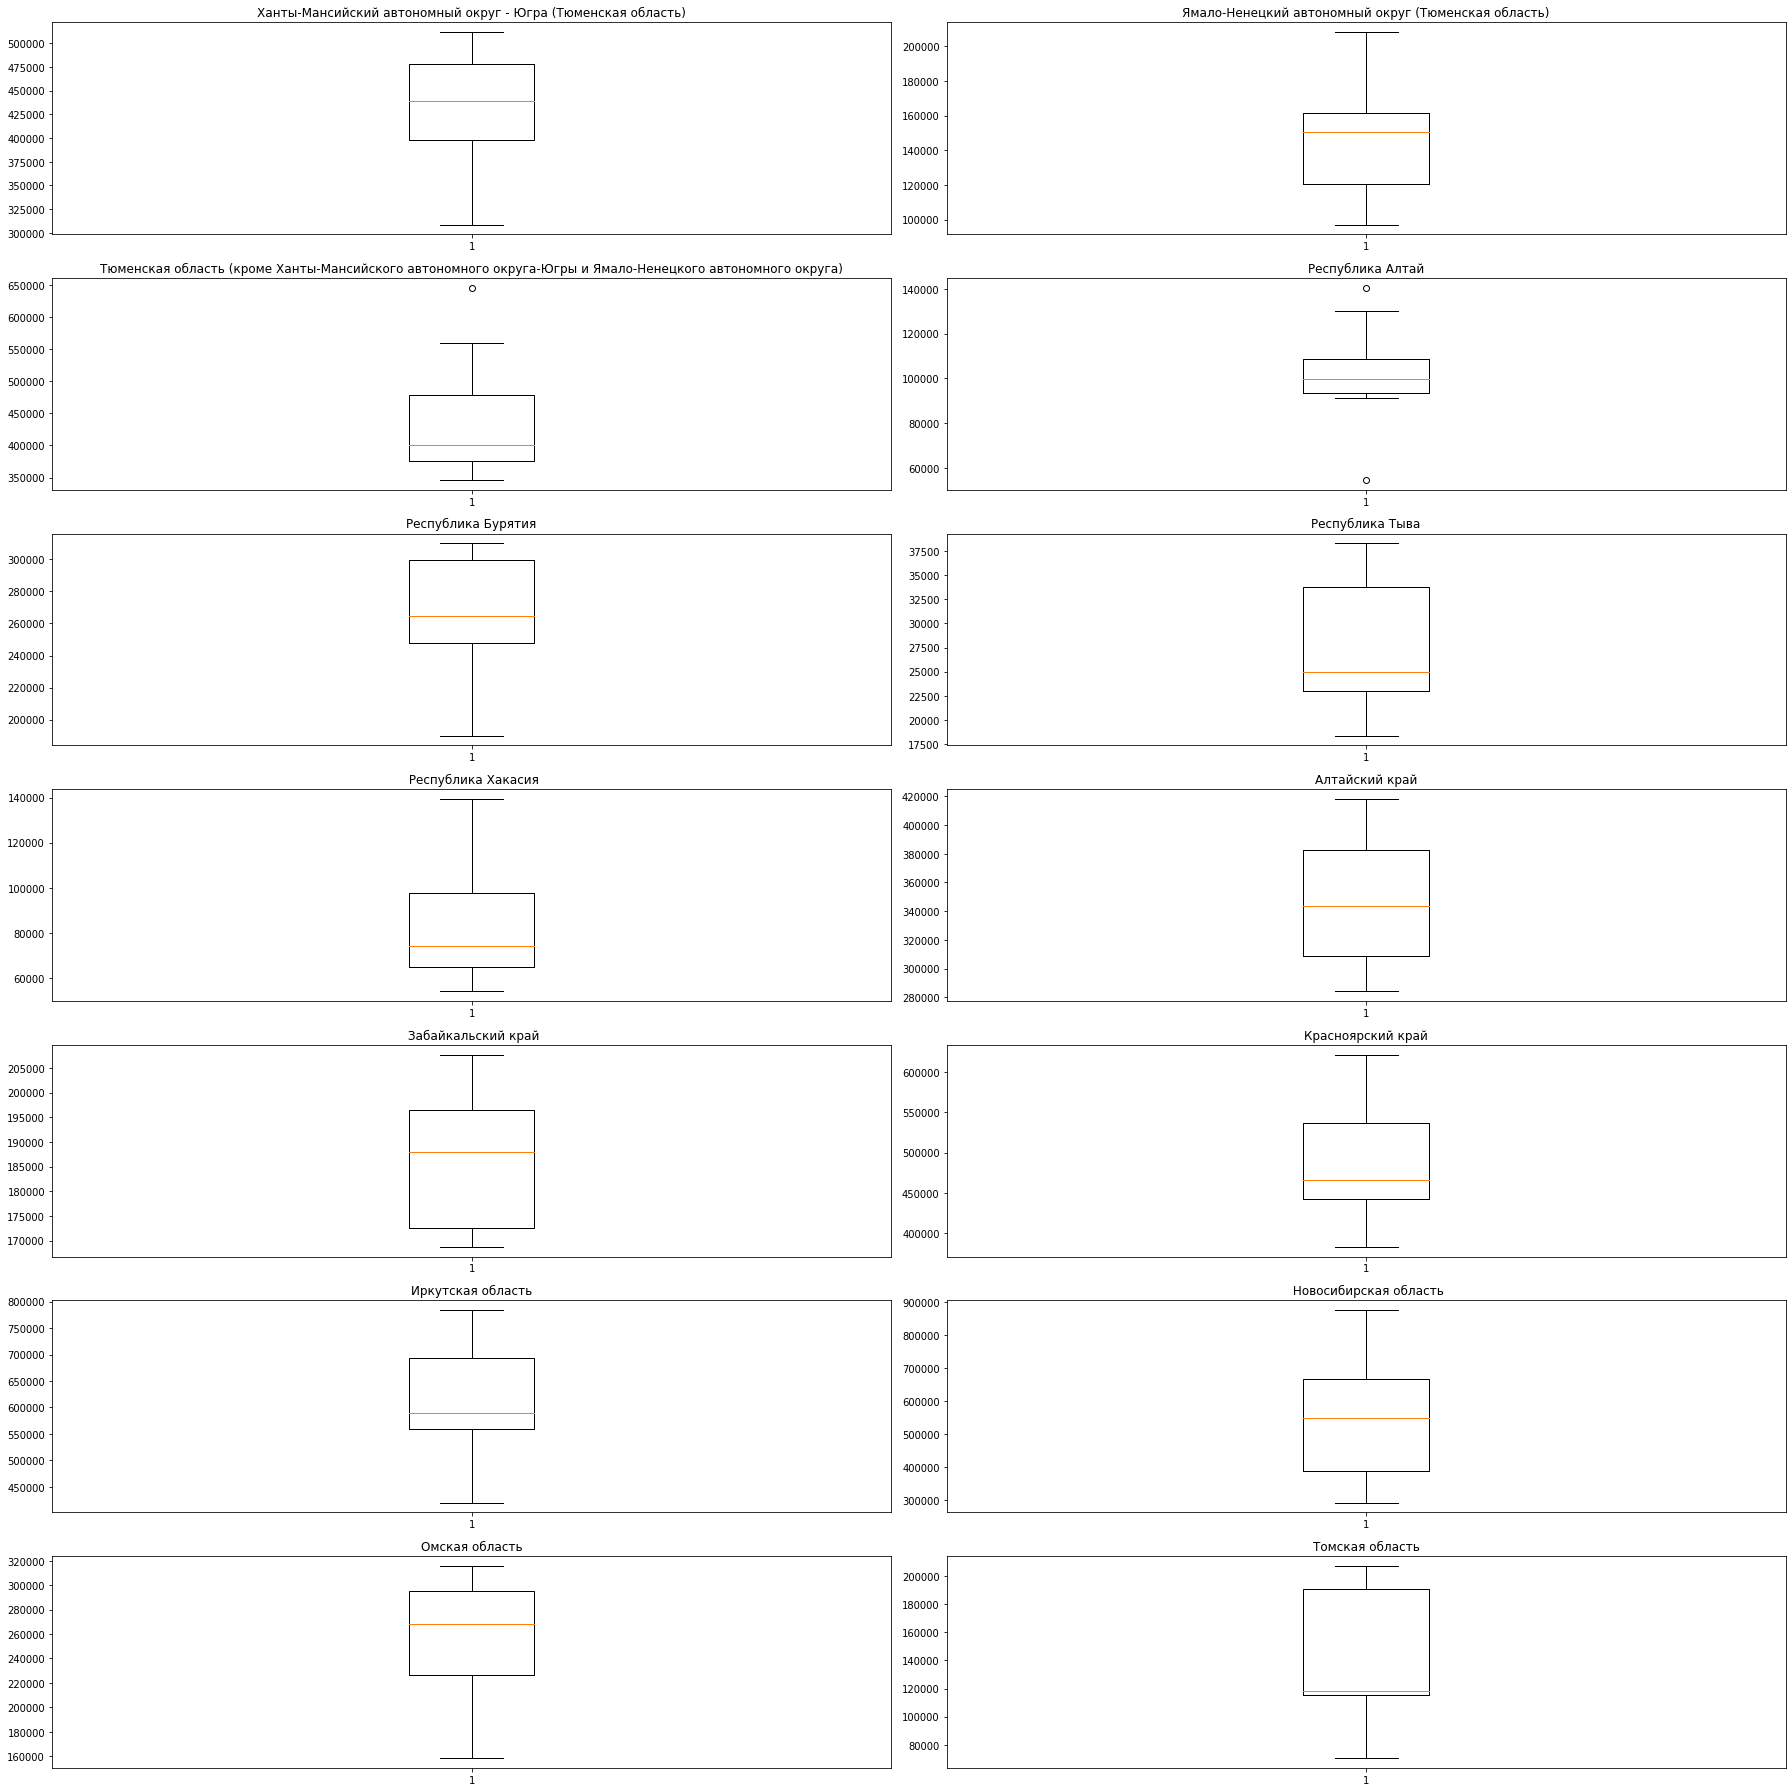

In [5]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(25)
fig.set_figwidth(25)
gs = gridspec.GridSpec(7, 2)
n = 0
for i in range(7):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.boxplot(data[names[n]].dropna())
        ax.set_title(names[n])
        n += 1


## С MinMax нормированием

In [6]:
a = -1
b = 1
data_normed_by_min_max = data.apply(lambda s: a + (s - s.min())/(s.max() - s.min()) * (b-a))
data_normed_by_min_max


,year,Ханты-Мансийский автономный округ - Югра (Тюменская область),Ямало-Ненецкий автономный округ (Тюменская область),Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа),Республика Алтай,Республика Бурятия,Республика Тыва,Республика Хакасия,Алтайский край,Забайкальский край,Красноярский край,Иркутская область,Новосибирская область,Омская область,Томская область
0,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.764706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.647059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.529412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.411765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,-0.294118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.176471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,-0.058824,-0.468474,-1.000000,NaN,-1.000000,-1.000000,0.531565,-0.858154,-1.000000,-1.000000,-0.504072,-1.000000,-1.000000,-1.000000,-0.278718
8,0.058824,-1.000000,-0.822817,NaN,-0.031615,-0.059795,0.550820,-0.753834,-0.689477,0.517655,-0.665340,-0.728564,-0.785677,-0.046427,-0.344441
9,0.176471,-0.127959,0.186092,-0.737866,0.052233,0.877093,0.792608,-0.647572,-0.153316,0.403988,-0.318817,-0.241045,-0.695121,0.759128,-0.320414


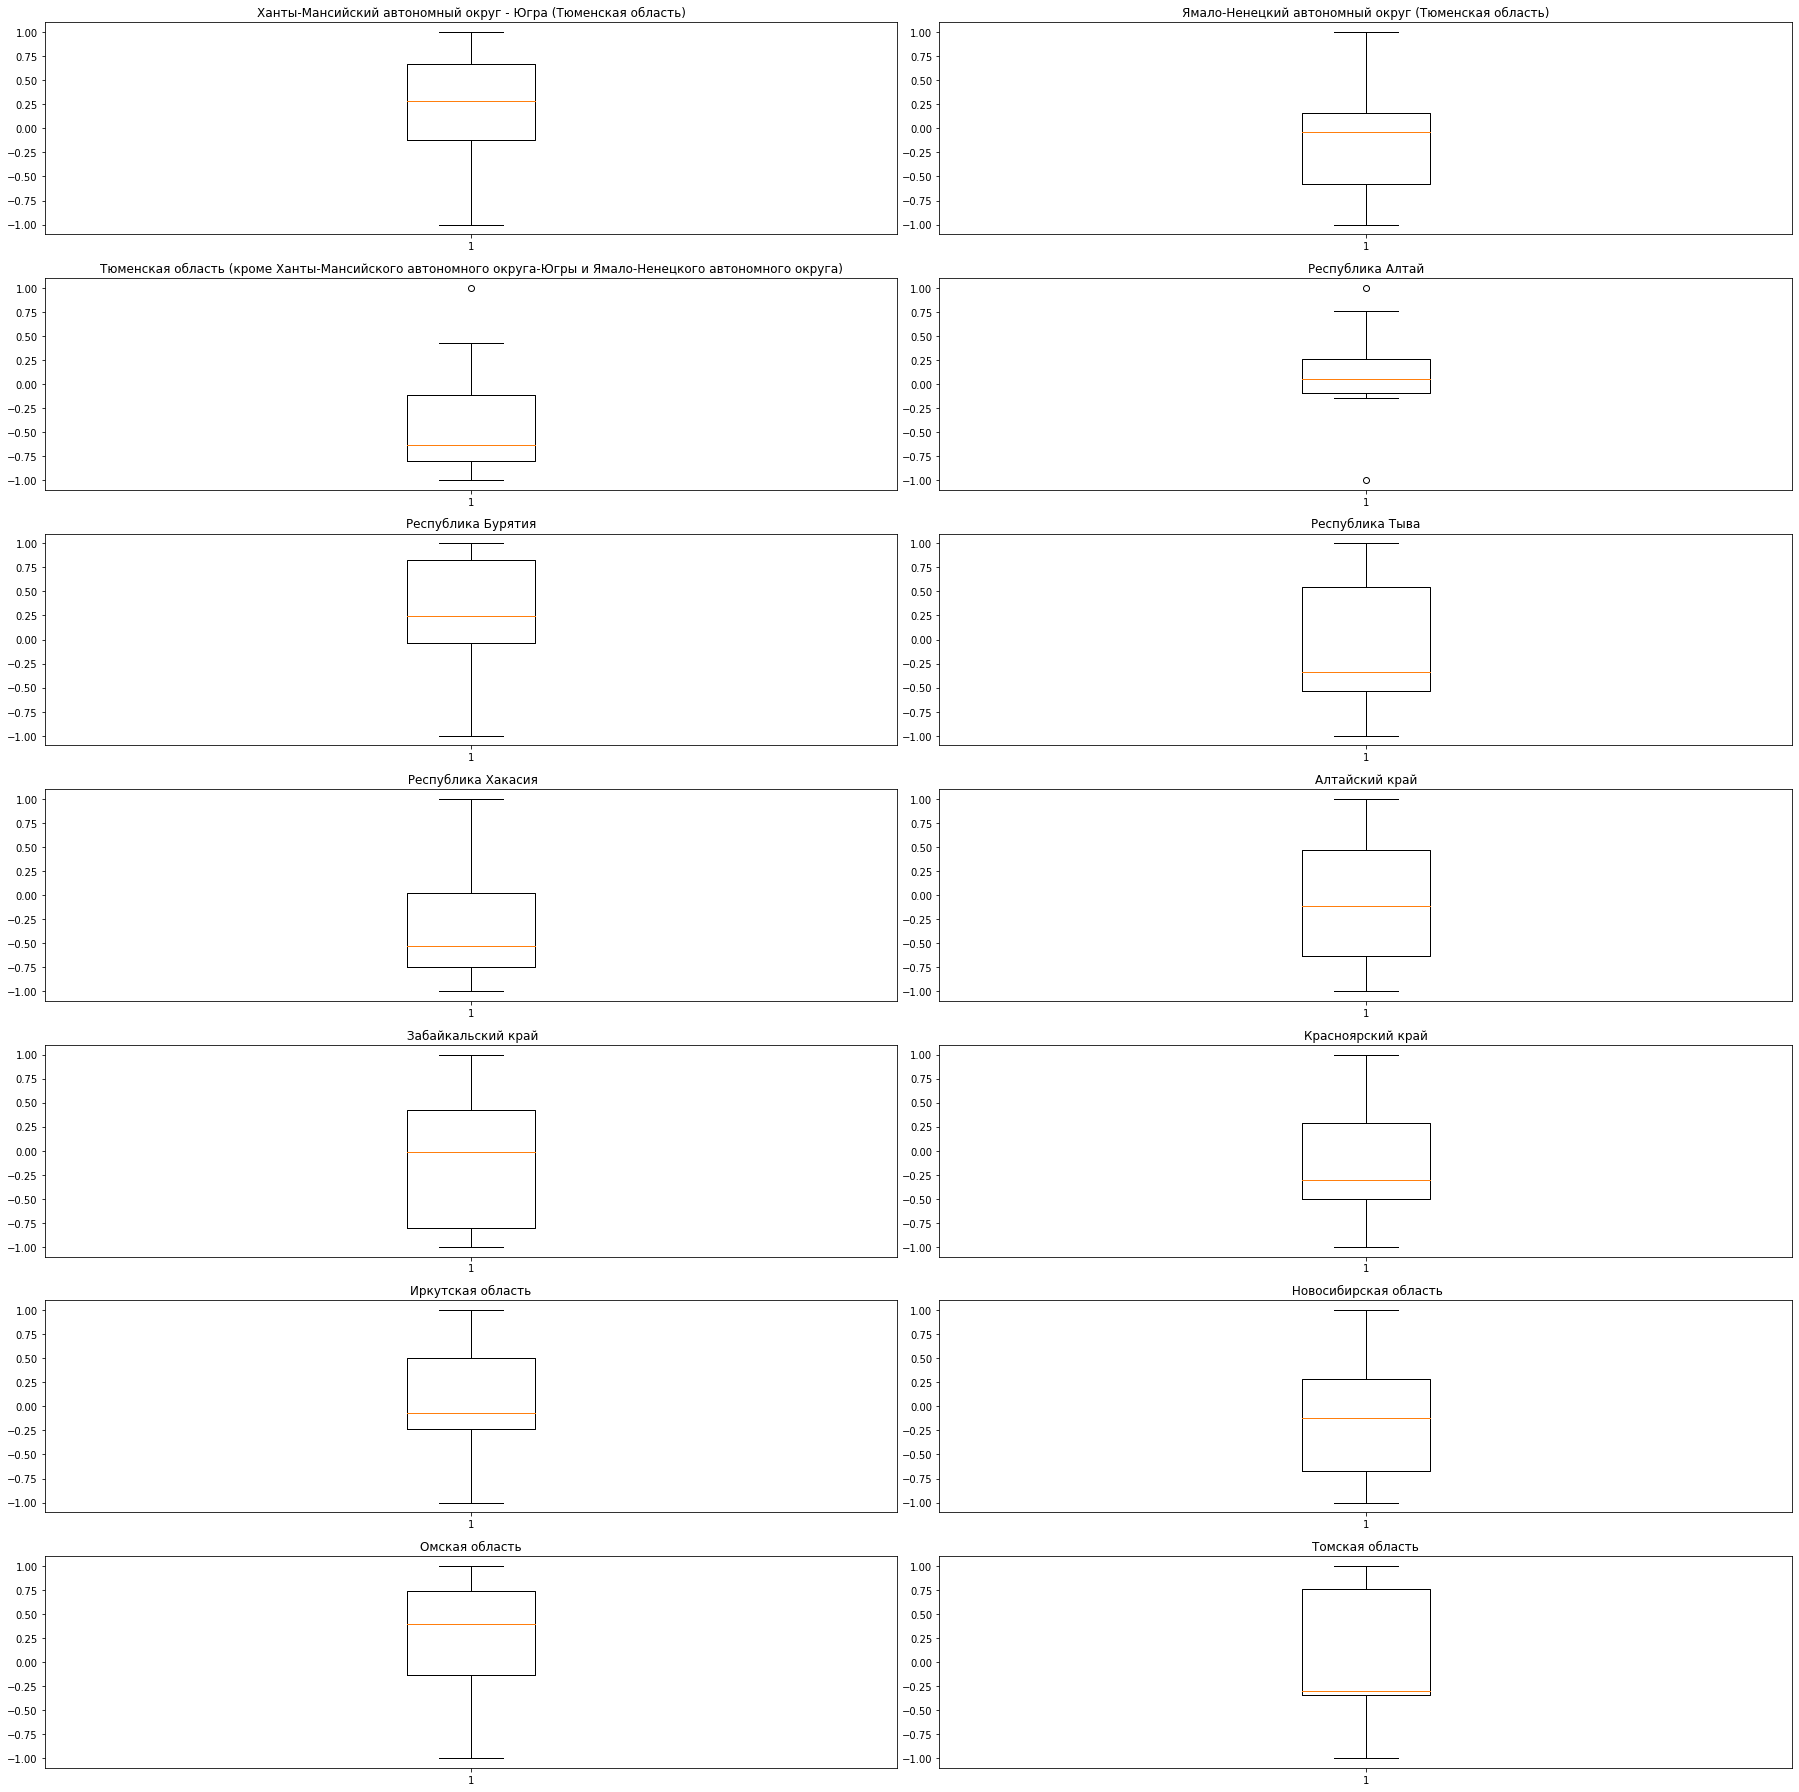

In [7]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(25)
fig.set_figwidth(25)
gs = gridspec.GridSpec(7, 2)
n = 0
for i in range(7):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.boxplot(data_normed_by_min_max[names[n]].dropna())
        ax.set_title(names[n])
        n += 1


## Со средне-дисперсной нормированием

In [8]:
a = -1
b = 1
data_normed_by_mean_dispersion = data.apply(lambda s: (s-s.mean())/s.std())


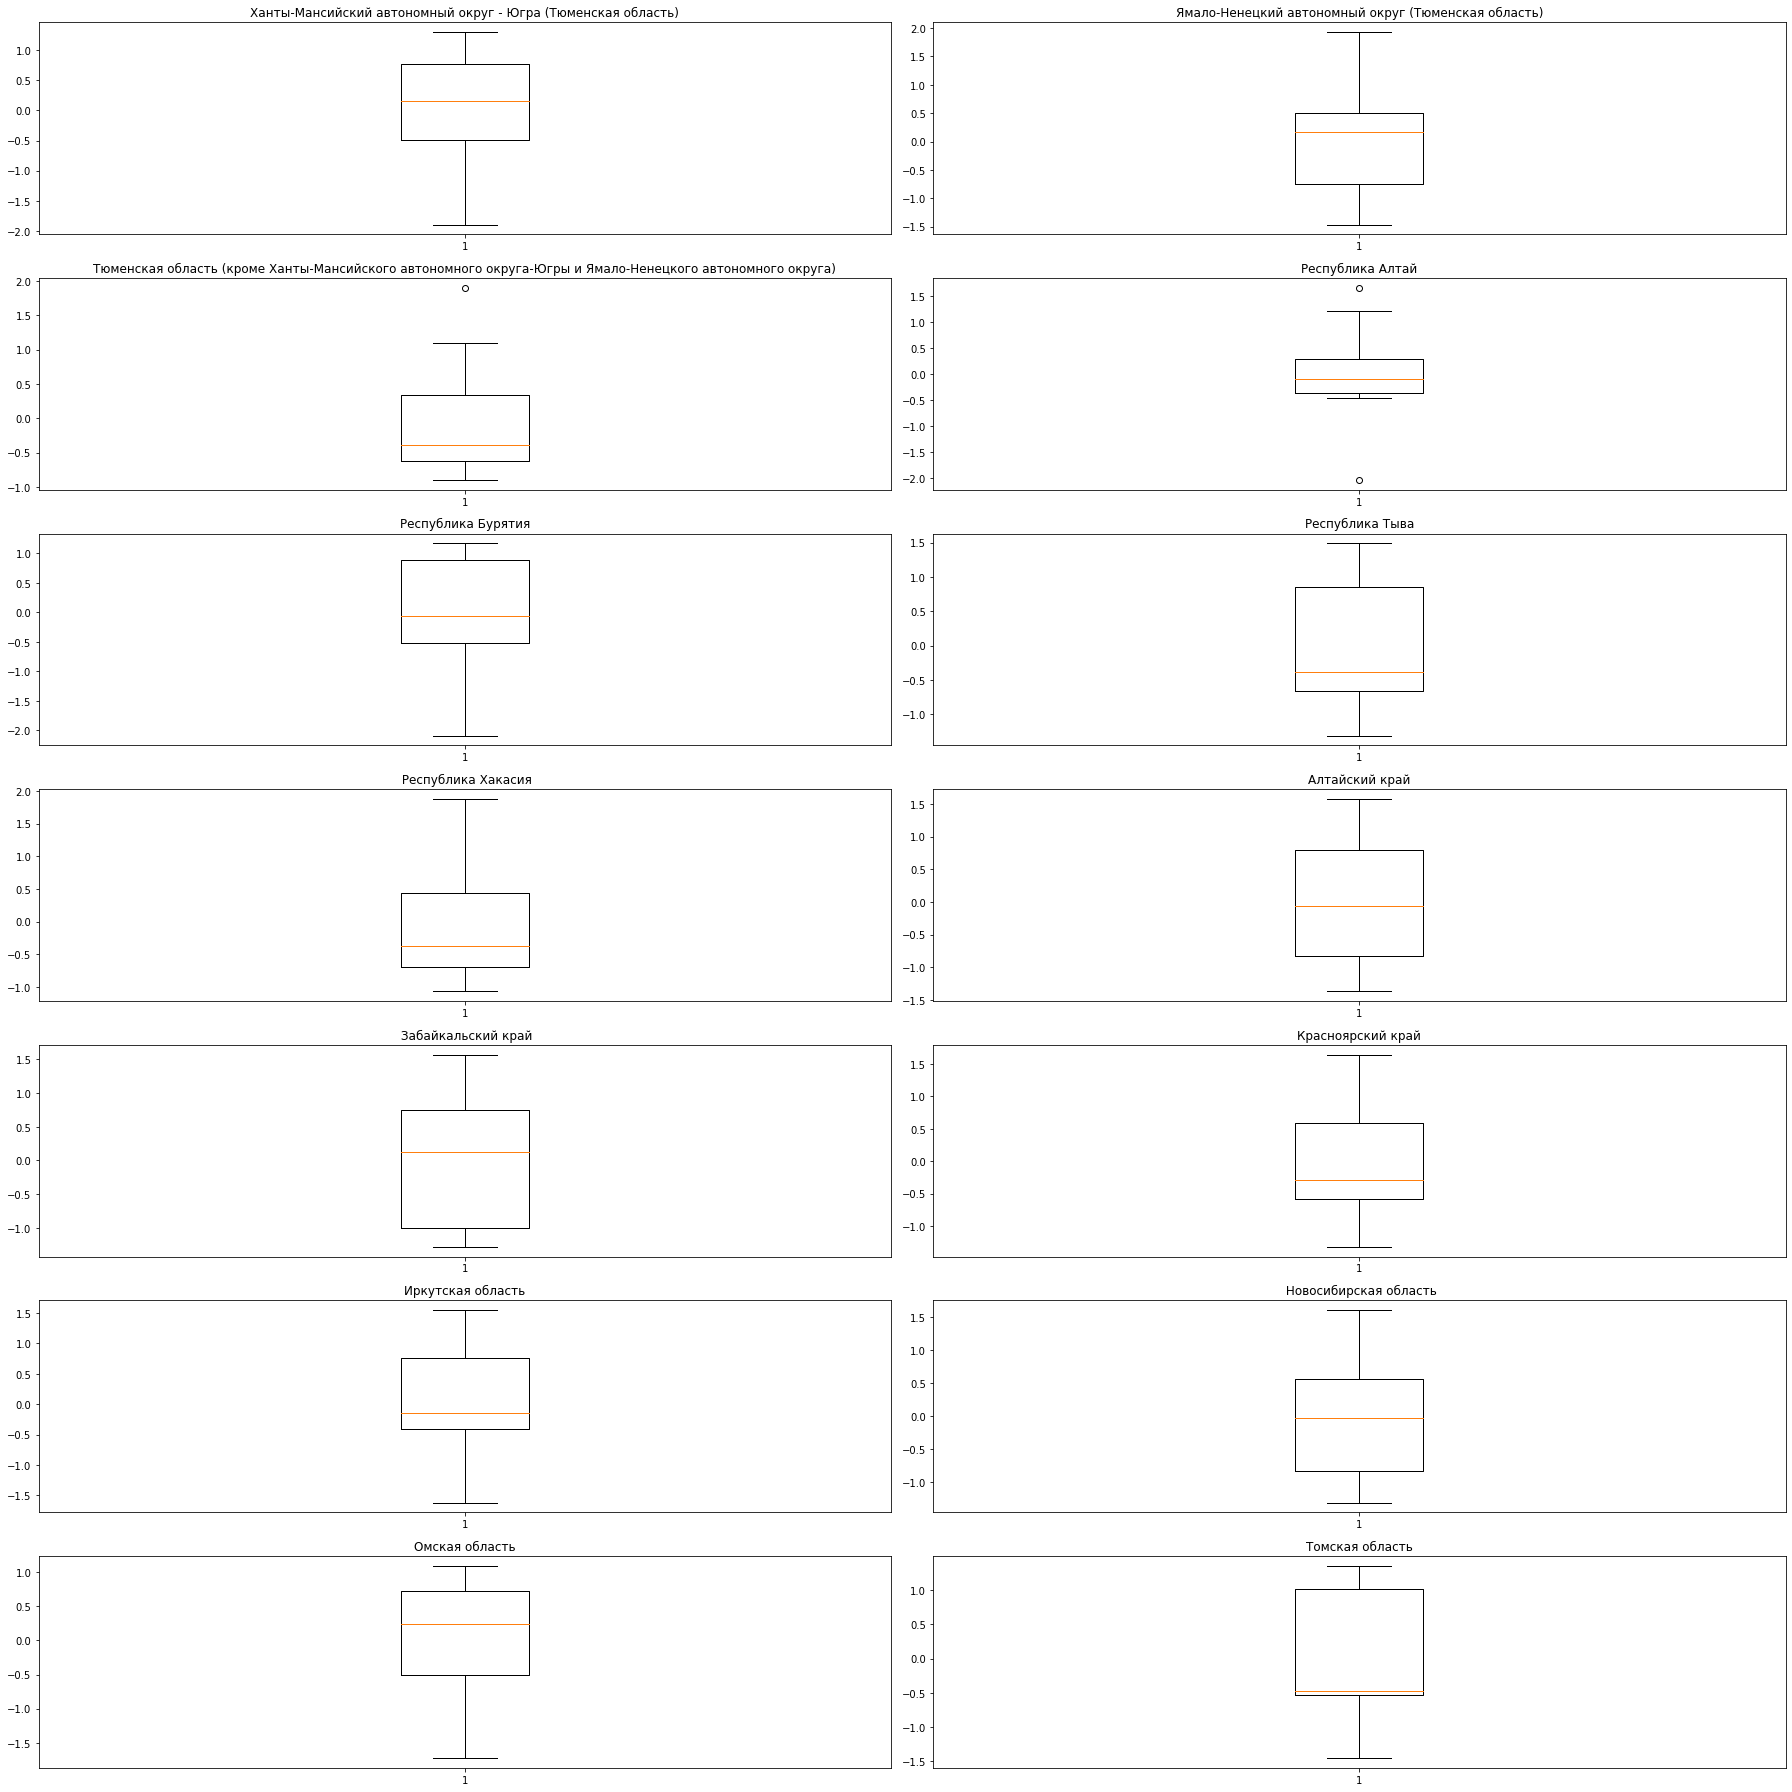

In [9]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(25)
fig.set_figwidth(25)
gs = gridspec.GridSpec(7, 2)
n = 0
for i in range(7):
    for j in range(2):
        ax = fig.add_subplot(gs[i, j])
        ax.boxplot(data_normed_by_mean_dispersion[names[n]].dropna())
        ax.set_title(names[n])
        n += 1


# Кореляция между городами

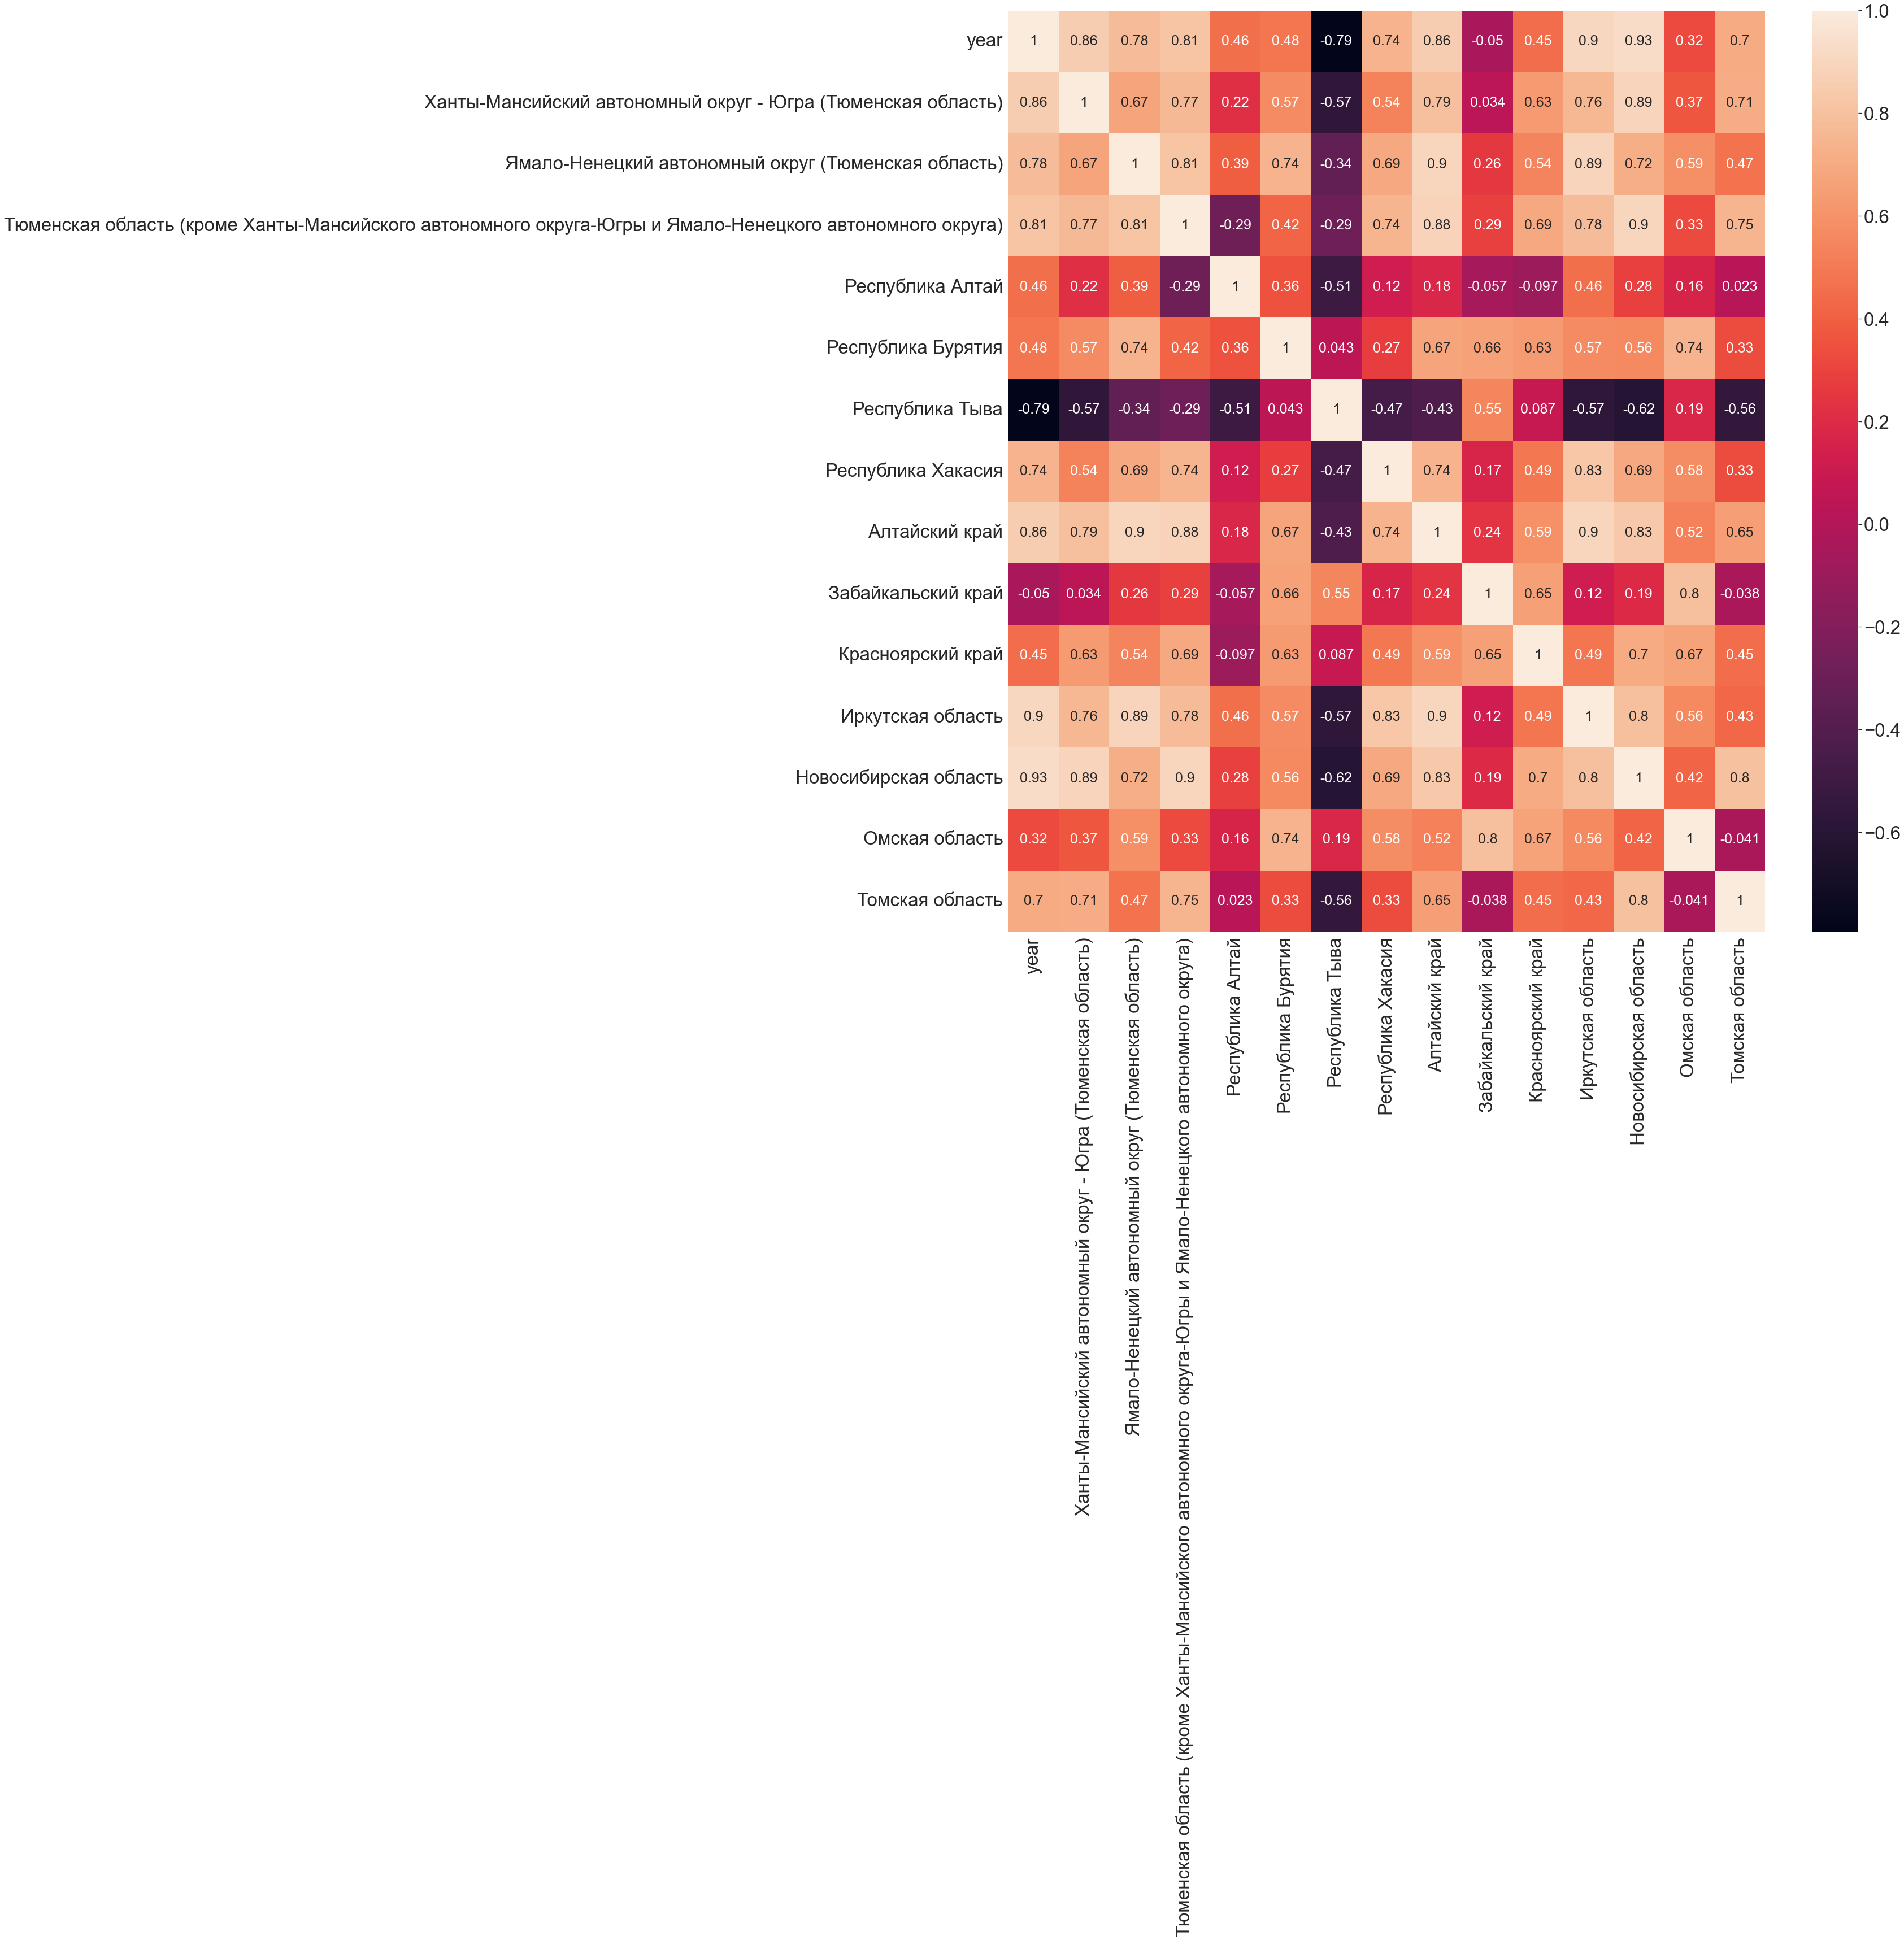

In [12]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(method='pearson'), annot=True, annot_kws={"fontsize":25}).get_figure()
sns.set(font_scale=3)
